In [1]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = None
 
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = [15,8]

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv(r'C:\Users\INDHUJA\Downloads\CAPSTON PROJECT\Telecom churn\new 1\df_cleaned.csv')
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,2.000000,2.000000,361.000000,62.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,2.000000,1.000000,1504.000000,40.000000,42.000000,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,No,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.300000,0.000000,1.300000,3.700000,0.000000,0.000000,0.000000,60,1,1,1.000000,1.000000,1812.000000,26.000000,26.000000,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,60,No,3-Good,Town,Crafts,Yes
3,No,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.000000,7.700000,76.000000,4.300000,1.300000,200.300000,370.300000,147.000000,555.700000,303.700000,59.700000,0.000000,22.700000,59,2,2,9.000000,4.000000,458.000000,30.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53,2,2,4.000000,3.000000,852.000000,46.000000,54.000000,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


**Split the dependent and independent variables**

In [3]:
# store the target variable 'Churn' in a dataframe 'df_target'
df_target = df['Churn']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Churn' using drop()
# 'axis = 1' drops the specified column
df_features = df.drop('Churn', axis = 1)

In [4]:
df_target.value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

In [5]:
for i in range(len(df_target)):
    if df_target[i] == 'Yes':
        df_target[i] = 1
    else:
        df_target[i] = 0 

In [6]:
df_target = df_target.astype(int)

In [7]:
df_target.value_counts()

0    36336
1    14711
Name: Churn, dtype: int64

**Distribution of dependent variable.**

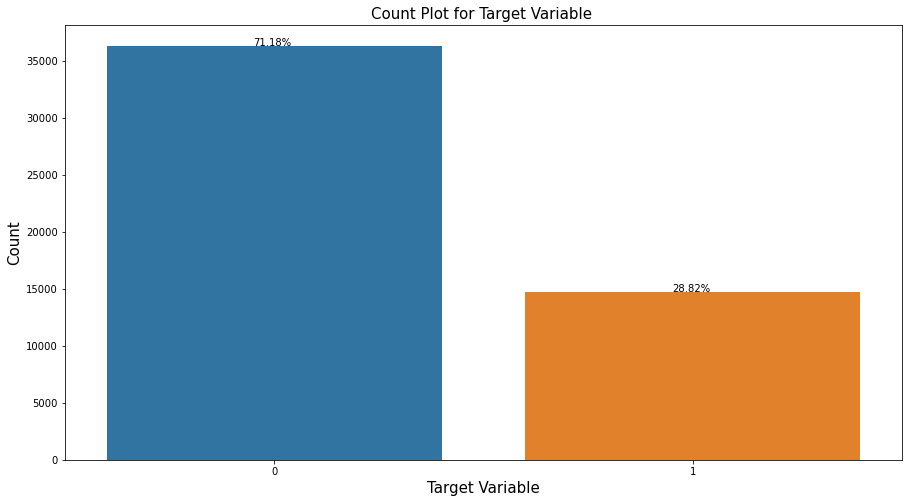

In [8]:
# get counts of 0's and 1's in the 'Loan Status' variable
df_target.value_counts()

# plot the countplot of the variable 'Loan Status'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable ', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

**Filter numerical and categorical variables.**

In [9]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
num_f = df_features.select_dtypes(include=[np.number])

# display numerical features
num_f.columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating',
       'HandsetPrice'],
      dtype='object')

In [10]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
cat_f = df_features.select_dtypes(exclude=[np.number])

# display categorical features
cat_f.columns

Index(['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

# Encoding the Categorical Variables

In [11]:
cat=df_features.select_dtypes(include='object').columns
cat

Index(['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

In [12]:
cat_f.head()

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,No,Yes,1-Highest,Suburban,Professional,No
1,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,4-Medium,Suburban,Professional,Yes
2,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,Yes,No,No,No,3-Good,Town,Crafts,Yes
3,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,Yes,No,No,No,4-Medium,Other,Other,No
4,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,1-Highest,Other,Professional,Yes


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() # Initializing our Label Encoder object 
cat_f[cat]=cat_f[cat].apply(le.fit_transform) # Transfering categorical data into numeric 
cat_f.head()

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,2,4,0
1,1,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,3,2,4,2
2,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,2,3,1,2
3,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,3,0,3,0
4,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,4,2


In [14]:
cat_f.shape

(51047, 20)

# POWER TRANSFORMATION

In our data we can see both positive & negative values. So we use yeo-johnson power Transformation as it works for both. 

In [15]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in num_f.columns:
    num_f[i]=PT.fit_transform(num_f[[i]])

In [16]:
num_f.head(20)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,-1.081555,-0.420406,-1.114949,-0.041736,-0.996427,-0.620104,-0.568643,-0.452839,-0.884189,-0.301052,-0.562132,-0.823872,-0.603512,0.464930,-1.604073,-1.178797,0.017986,-0.212723,-0.892987,-0.067861,-0.146540,2.469209,1.162529,-0.582570,0.806246,1.119186,0.104253,1.172629,-0.939988,5.315383,-0.132521,-0.221337,-0.004500,-0.193264,-1.191064
1,-1.543960,-1.930318,-1.432431,-0.912711,-0.996427,-0.620104,0.019325,0.088119,-1.195110,-1.212365,-1.006690,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.309976,-1.529097,-1.422588,-0.067861,-0.894945,2.379749,-0.761324,-0.582570,0.806246,-0.767295,3.032270,0.489795,1.056899,-0.188133,-0.132521,-0.221337,0.292259,-0.193264,-1.191064
2,-0.417830,-1.990611,-0.274291,-0.912711,-0.996427,-0.620104,0.027093,0.088119,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.489334,-1.459857,-1.178797,-1.656010,-1.147309,-1.667934,-0.067861,-0.894945,2.439936,-0.761324,-0.582570,-0.850952,-0.767295,3.588779,-0.021550,0.853192,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,-0.051356
3,0.826127,1.395488,1.183858,1.174017,-0.996427,-0.620104,0.657306,0.284697,2.226035,1.293586,1.350745,1.504542,1.948860,0.943697,2.901567,2.060902,2.500800,1.812611,2.043458,-0.067861,1.849345,2.410123,1.162529,1.345801,1.895742,1.700430,0.461891,0.133216,-0.939988,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,-2.659163
4,-1.532581,-2.458386,-1.432431,-0.912711,-0.996427,-0.620104,0.034881,0.082920,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.888772,-1.799405,-1.667934,-0.067861,-0.894945,2.218719,1.162529,1.345801,1.593762,1.552457,1.617268,0.687632,1.160401,-0.188133,-0.132521,-0.221337,1.370258,5.174275,-2.659163
5,-0.415850,0.615209,0.332871,-0.041736,-0.996427,-0.620104,0.621499,0.004735,0.902436,0.303259,-0.094674,0.453496,-0.603512,-0.020538,-0.365139,-1.178797,-0.379204,0.319306,0.587781,-0.067861,0.413140,2.218719,-0.761324,-0.582570,1.352031,1.119186,-0.463638,0.056858,-0.939988,-0.188133,-0.132521,-0.221337,-1.018895,5.174275,-1.191064
6,-0.688147,-1.610822,-0.668640,-0.041736,-0.996427,-0.620104,0.271932,0.187202,-1.510615,-0.071062,-1.077476,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.604515,-1.401470,-1.022222,-0.067861,-0.894945,2.348794,1.162529,1.345801,0.806246,1.119186,0.924723,0.875983,1.189400,-0.188133,-0.132521,-0.221337,1.370258,5.174275,-1.191064
7,0.354800,-0.964104,0.867736,1.565115,-0.996427,-0.620104,0.129407,0.254047,-1.510615,-0.728616,-0.814899,1.478795,-0.603512,-1.595289,-0.690543,-1.178797,-1.148366,-0.859542,-1.422588,-0.067861,-0.894945,2.410123,1.162529,1.345801,1.352031,1.552457,0.482681,0.687632,1.094634,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,-1.191064
8,-0.528044,-1.641732,-0.417233,-0.912711,-0.996427,-0.620104,0.113606,0.080305,-1.510615,-1.212365,-1.374344,-0.823872,-0.603512,-1.181533,-0.650711,-0.117614,-1.069099,-1.401470,-1.667934,-0.067861,-0.894945,2.218719,1.580656,1.972305,1.593762,1.552457,0.747789,0.351682,0.968106,-0.188133,-0.132521,-0.221337,1.370258,-0.193264,0.474576
9,0.799233,1.119283,1.183858,-0.912711,-0.996427,-0.620104,0.204571,0.148295,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.888772,-1.799405,-1.667934,-0.067861,-0.894945,2.285055,-0.761324,-0.582570,1.895742,1.763726,0.208262,0.687632,1.253254,-0.188133,-0.132521,-0.221337,0.292259,5.174275,-1.191064


In [17]:
num_f.shape

(51047, 35)

**Concatenate scaled numerical and Label encoded categorical variables**

In [18]:
df_features = pd.concat([cat_f,num_f], axis =1)
df_features.shape

(51047, 55)

In [19]:
df_features.head()

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,2,4,0,-1.081555,-0.420406,-1.114949,-0.041736,-0.996427,-0.620104,-0.568643,-0.452839,-0.884189,-0.301052,-0.562132,-0.823872,-0.603512,0.464930,-1.604073,-1.178797,0.017986,-0.212723,-0.892987,-0.067861,-0.146540,2.469209,1.162529,-0.582570,0.806246,1.119186,0.104253,1.172629,-0.939988,5.315383,-0.132521,-0.221337,-0.004500,-0.193264,-1.191064
1,1,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,3,2,4,2,-1.543960,-1.930318,-1.432431,-0.912711,-0.996427,-0.620104,0.019325,0.088119,-1.195110,-1.212365,-1.006690,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.309976,-1.529097,-1.422588,-0.067861,-0.894945,2.379749,-0.761324,-0.582570,0.806246,-0.767295,3.032270,0.489795,1.056899,-0.188133,-0.132521,-0.221337,0.292259,-0.193264,-1.191064
2,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,2,3,1,2,-0.417830,-1.990611,-0.274291,-0.912711,-0.996427,-0.620104,0.027093,0.088119,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.489334,-1.459857,-1.178797,-1.656010,-1.147309,-1.667934,-0.067861,-0.894945,2.439936,-0.761324,-0.582570,-0.850952,-0.767295,3.588779,-0.021550,0.853192,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,-0.051356
3,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,3,0,3,0,0.826127,1.395488,1.183858,1.174017,-0.996427,-0.620104,0.657306,0.284697,2.226035,1.293586,1.350745,1.504542,1.948860,0.943697,2.901567,2.060902,2.500800,1.812611,2.043458,-0.067861,1.849345,2.410123,1.162529,1.345801,1.895742,1.700430,0.461891,0.133216,-0.939988,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,-2.659163
4,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,4,2,-1.532581,-2.458386,-1.432431,-0.912711,-0.996427,-0.620104,0.034881,0.082920,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.888772,-1.799405,-1.667934,-0.067861,-0.894945,2.218719,1.162529,1.345801,1.593762,1.552457,1.617268,0.687632,1.160401,-0.188133,-0.132521,-0.221337,1.370258,5.174275,-2.659163


In [20]:
df_target.nunique()

2

# Train-Test Split

We need to split the data into Train & Test before applying various classification techniques to predict the Churn

In [21]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test ,y_train ,y_test = train_test_split(df_features,df_target, random_state=10, test_size=0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('x_train: ',X_train.shape)
print('y_train: ',y_train.shape)

# print dimension of test set
print('x_test: ',X_test.shape)
print('y_test: ',y_test.shape)

x_train:  (35732, 55)
y_train:  (35732,)
x_test:  (15315, 55)
y_test:  (15315,)


# BASE MODEL

# Logistic Regression

Create a function that can create a pandas DataFrame with the scores for multiple models. The function should be flexible enough to accept different types of model scores and column names, and be able to handle varying numbers of models and scores.

In [22]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = lr_model.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

# Logistic Regression (Full Model)

Build a full logistic model on a training dataset

In [23]:
# build the model on train data (x_train and y_train)
# use fit() to fit the logistic regression model
lr_model = sm.Logit(y_train,X_train).fit()

# print the summary of the model
print(lr_model.summary())

Optimization terminated successfully.
         Current function value: 0.579668
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                35732
Model:                          Logit   Df Residuals:                    35677
Method:                           MLE   Df Model:                           54
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                 0.03417
Time:                        22:08:24   Log-Likelihood:                -20713.
converged:                       True   LL-Null:                       -21446.
Covariance Type:            nonrobust   LLR p-value:                4.177e-271
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
ChildrenInHH                  0.1339      0.033      4.082      0.000       0.

**Interpretation:** The given model summary provides the value of McFadden's R-squared, which is a measure of the goodness-of-fit for the logistic regression model. McFadden's R-squared value can be calculated using a formula that takes into account the log-likelihood values of the model with covariates and the null model (model with only the intercept).

The LLR p-value less than 0.05 suggests that the model is statistically significant, indicating that the independent variables included in the model have a significant effect on the outcome variable.

**Calculate the AIC (Akaike Information Criterion) value.**

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

In [24]:
# 'aic' retuns the AIC value for the model
print('AIC:', lr_model.aic)

AIC: 41535.41965703098


In [25]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(lr_model.params), columns= ['Odds']) 

# print the dataframe
df_odds.head()

,Odds
ChildrenInHH,1.143313
HandsetRefurbished,1.258489
HandsetWebCapable,0.880098
TruckOwner,1.008374
RVOwner,0.954746


Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1

**Do predictions on the test set.**

In [26]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = lr_model.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

41406   0.227841
47201   0.246972
33295   0.400590
39163   0.313860
2285    0.313550
dtype: float64

In [27]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [28]:
# print the first five observations of y_pred
y_pred[0:5]

[0, 0, 0, 0, 0]

**Plot the confusion matrix.**

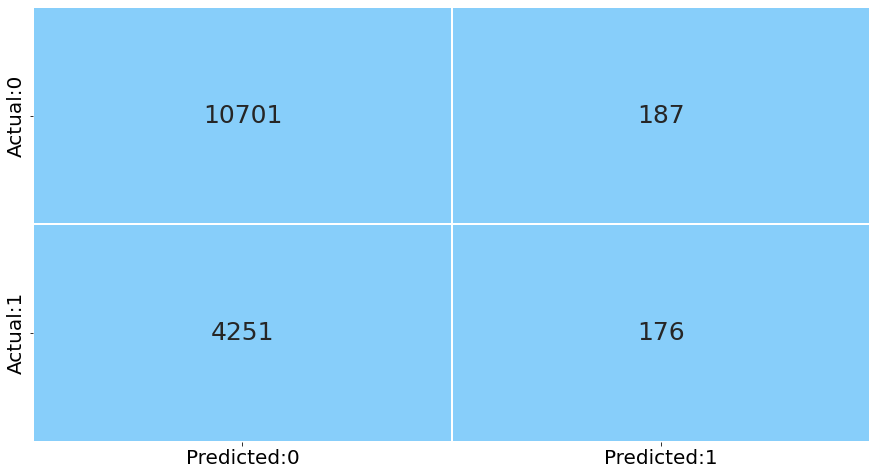

In [29]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()


In [30]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.72      0.98      0.83     10888
           1       0.48      0.04      0.07      4427

    accuracy                           0.71     15315
   macro avg       0.60      0.51      0.45     15315
weighted avg       0.65      0.71      0.61     15315



**Interpretation:** 

From the above output, we can infer that the recall of the positive class is known as `sensitivity` and the recall of the negative class is `specificity`.

`support` is the number of observations in the corresponding class.

The `macro average` in the output is obtained by averaging the unweighted mean per label and the `weighted average` is given by averaging the support-weighted mean per label.

**Kappa score**

The Kappa statistic is a measure of inter-rater agreement that takes into account chance agreement. It is commonly used in the field of machine learning and statistics to evaluate the performance of a classification model. The Kappa value ranges from -1 to 1, where a value of 1 indicates perfect agreement, a value of 0 indicates agreement due to chance, and a value less than 0 indicates disagreement beyond chance. The Kappa value is a useful metric because it can help to identify issues with the quality of the data or the model, and it can provide insights into how to improve the model's performance.

In [31]:
from sklearn.metrics import cohen_kappa_score

# calculate the kappa score
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa score
print("Kappa Score: ", kappa)

Kappa Score:  0.031034039734465058


**Interpretation** The Kappa score of 0.031 indicates that the level of agreement between the actual and predicted target values is very low. The Kappa score ranges from -1 to 1, with 1 indicating perfect agreement and 0 indicating the agreement that would be expected by chance alone. In this case, the score of 0.031 indicates that there is very little agreement between the actual and predicted target values and the predictions are not much better than random guessing.

**Plot the ROC curve**

An ROC curve is a graph that shows how well a model can distinguish between positive and negative classes. The true positive rate (TPR) is plotted on the y-axis, which represents the proportion of actual positive cases that are correctly identified by the model, while the false positive rate (FPR) is plotted on the x-axis, which represents the proportion of actual negative cases that are incorrectly classified as positive by the model. The area under the ROC curve is a measure of how well the model can separate the positive and negative cases, with a larger area indicating better performance.

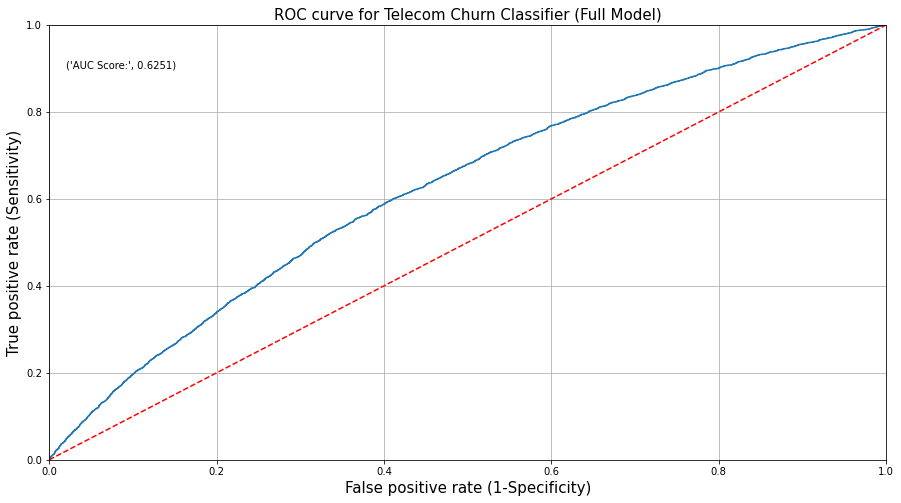

In [32]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Telecom Churn Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

**Interpretation:** In general, an AUC of 0.6-0.7 is considered to be a moderate level of discrimination, while an AUC of 0.7-0.8 is considered good, and an AUC of 0.8-0.9 is considered excellent. However, the interpretation of the AUC value also depends on the specific context and the costs associated with false positives and false negatives.

Therefore, while an AUC of 0.62 may not be ideal, it still suggests that the model has some level of discriminatory power and may be useful in some contexts. However, it would be advisable to consider other metrics and evaluate the model's performance more thoroughly before making any definitive conclusions.

In [33]:
metrics.accuracy_score(y_test, y_pred)

0.7102187397975841

In [34]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(lr_model, value)

In [35]:
# print the score card 
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)
# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.625067,0.289869,0.997289,0.292981,0.002263,0.449181
1,0.200000,0.625067,0.313563,0.903998,0.400196,0.063740,0.465620
2,0.300000,0.625067,0.384427,0.530834,0.618675,0.166419,0.445920
3,0.400000,0.625067,0.447107,0.172803,0.699119,0.105039,0.249267
4,0.500000,0.625067,0.484848,0.039756,0.710219,0.031034,0.073486
5,0.600000,0.625067,0.561644,0.009261,0.711525,0.008927,0.018222
6,0.700000,0.625067,0.500000,0.001129,0.710937,0.000952,0.002254
7,0.800000,0.625067,0.000000,0.000000,0.710937,0.000000,0.000000
8,0.900000,0.625067,0.000000,0.000000,0.710937,0.000000,0.000000


**Interpretation:** As per the above dataframe, the model cut_off probability 0.6, returns the highest AUC score, f1-score, kappa score and accuracy.

#### In the above method, we passed the list of values for the cut-off. But, this method is not efficient as one can pass different values and obtain a cut-off based on the passed values.

#### To obtain the optimal cut-off value we use the following methods:

1. Youden's Index
2. Cost-based Method

# Using SMOTE

Balancing the imbalanced data will improve the classification models. We will try balancing our data by using SMOTE

In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10)

In [37]:
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

<AxesSubplot:>

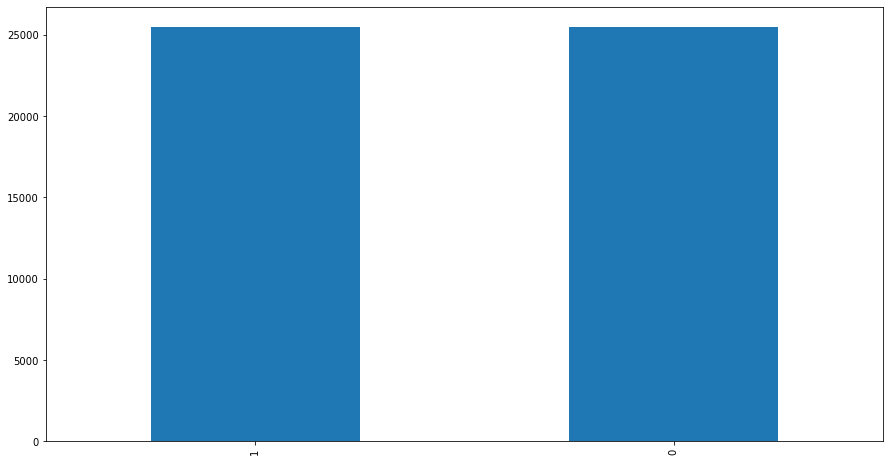

In [38]:
# observe that data has been balanced
pd.Series(y_train).value_counts().plot.bar()

In [39]:
import statsmodels.api as sm

In [46]:
# build the model on train data (x_train and y_train)
# use fit() to fit the logistic regression model
lr_model = sm.Logit(y_train,X_train).fit()

# print the summary of the model
print(lr_model.summary())

Optimization terminated successfully.
         Current function value: 0.631300
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                50896
Model:                          Logit   Df Residuals:                    50841
Method:                           MLE   Df Model:                           54
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                 0.08923
Time:                        22:37:03   Log-Likelihood:                -32131.
converged:                       True   LL-Null:                       -35278.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
ChildrenInHH                 -0.1410      0.027     -5.201      0.000      -0.

**Interpretation:** The result shows that the model has converged successfully, with a log-likelihood of -32131. The LL-Null value, which is the log-likelihood of a model with no predictors, is -35278, indicating that the model with predictors is a better fit than a model with no predictors.

The Pseudo R-squared value of 0.08923 suggests that the model explains 8.9% of the variability in the outcome variable.

The coefficient estimates and their standard errors are listed for each predictor variable. The coefficient estimate indicates the direction and magnitude of the relationship between the predictor and the outcome variable. A positive coefficient indicates that the probability of the outcome increases as the predictor increases, while a negative coefficient indicates that the probability of the outcome decreases as the predictor increases.

The standard error measures the uncertainty associated with the coefficient estimate. The z-value and the corresponding p-value test whether the coefficient estimate is significantly different from zero. A small p-value (typically less than 0.05) indicates that the predictor is statistically significant and has a significant effect on the outcome variable.



#### Calculate the AIC (Akaike Information Criterion) value.

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

In [47]:
# 'aic' retuns the AIC value for the model
print('AIC:', lr_model.aic)

AIC: 64371.311697265824


### Interpret the odds for each variable

In [48]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(lr_model.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
ChildrenInHH,0.868465
HandsetRefurbished,0.722372
HandsetWebCapable,0.691607
TruckOwner,0.723405
RVOwner,0.753834
Homeownership,0.497917
BuysViaMailOrder,0.920740
RespondsToMailOffers,0.790520
OptOutMailings,0.478925
NonUSTravel,0.582679


Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1

### Do predictions on the test set.

In [49]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = lr_model.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

41406   0.402313
47201   0.535048
33295   0.517126
39163   0.486201
2285    0.453109
dtype: float64

In [50]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.6 else 1 for x in y_pred_prob]

In [51]:
# print the first five observations of y_pred
y_pred[0:5]

[0, 0, 0, 0, 0]

### Plot the confusion matrix.

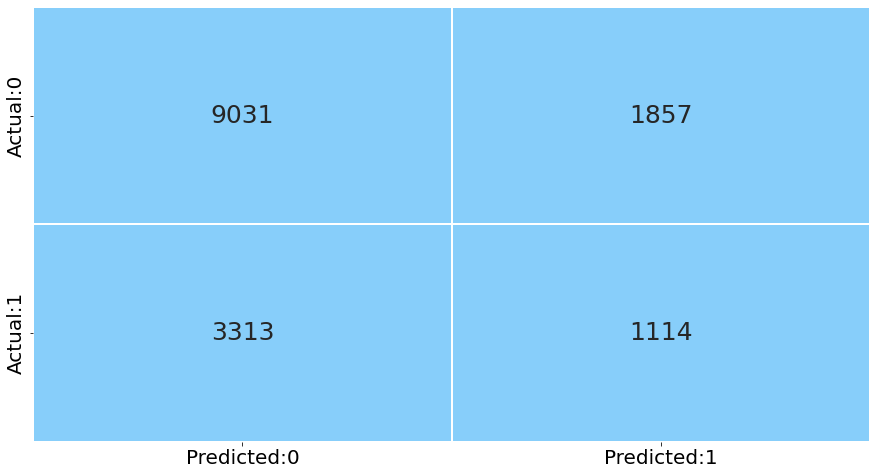

In [52]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [53]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.73      0.83      0.78     10888
           1       0.37      0.25      0.30      4427

    accuracy                           0.66     15315
   macro avg       0.55      0.54      0.54     15315
weighted avg       0.63      0.66      0.64     15315



**Interpretation:** 

From the above output, we can infer that the recall of the positive class is known as `sensitivity` and the recall of the negative class is `specificity`.

`support` is the number of observations in the corresponding class.

The `macro average` in the output is obtained by averaging the unweighted mean per label and the `weighted average` is given by averaging the support-weighted mean per label.

### Kappa score

It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [54]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.0898508394768186


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.5) is 0.0898, we can say that there is substantial agreement between the actual and predicted values.

### Plot the ROC curve

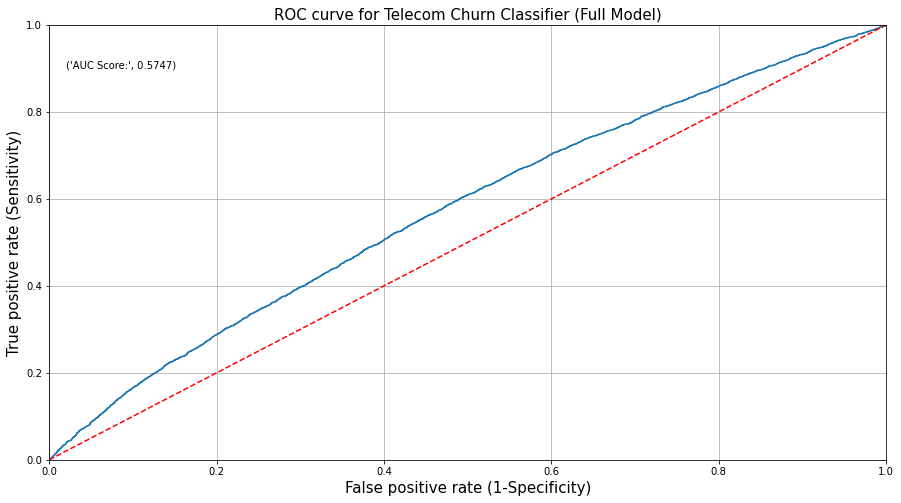

In [55]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Telecom Churn Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

### Interpretation: 
The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
From the above plot, we can see that our classifier (logistic regression) is away from the dotted line; with the AUC score 0.5747.

In [56]:
metrics.accuracy_score(y_test, y_pred)

0.662422461638916

In [57]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(lr_model, value)

In [58]:
# print the score card 
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.625067,0.289869,0.997289,0.292981,0.002263,0.449181
1,0.100000,0.574746,0.289307,0.992546,0.293046,0.000685,0.448024
2,0.200000,0.625067,0.313563,0.903998,0.400196,0.063740,0.465620
3,0.200000,0.574746,0.294559,0.948950,0.328306,0.015011,0.449569
4,0.300000,0.625067,0.384427,0.530834,0.618675,0.166419,0.445920
5,0.300000,0.574746,0.306193,0.840976,0.403199,0.043589,0.448933
6,0.400000,0.625067,0.447107,0.172803,0.699119,0.105039,0.249267
7,0.400000,0.574746,0.323164,0.681952,0.495201,0.076140,0.438521
8,0.500000,0.625067,0.484848,0.039756,0.710219,0.031034,0.073486
9,0.500000,0.574746,0.342294,0.463068,0.587594,0.091694,0.393625
